In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson,norm 

**General Comment:** All plots must be presented appropriately, which entails including labels and legends. When requesting an analytic expression, please provide the entire derivation.

## The Poisson distribution

If $X$ follows a Poisson distribution with parameter $\lambda$, then the probability mass function (PMF) of $X$ is given by:
$$P_\lambda(X = k) =f(k,\lambda)= \frac{e^{-\lambda} \lambda^k}{k!},$$
where:
\begin{align*}
&\lambda \text{ is the parameter of the Poisson distribution,} \\
&k \text{ is a non-negative integer,} \\
&k! \text{ denotes the factorial of } k.
\end{align*}

Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed (i.i.d.) Poisson random variables with parameter $\lambda$. 

**Exercise 1:** What are the theoretical means, variances, and standard deviations of $X$ and $\bar X=\frac{1}{n}\sum_i^n X_i$? Express all the results as functions of $\lambda$ and $n$.

### Poisson Random Variable $X$

If $X \sim Pois(\lambda)$, then the theoretical mean, variance and standard deviation of $X$ is:

$$ \text{Mean: } \mu = \lambda $$

$$ \text{Variance: } \sigma^2 = \lambda $$

$$ \text{Standard deviation: } \sigma = \sqrt{\lambda} $$

### The random variable: Mean $\bar{X} $

In order to determine the values of $\mu_{\bar{X}}, \sigma^2_{\bar{X}}, \sigma_{\bar{X}}$, we need to apply the definition of each concept, the fact that all the considered random variables are independent and simplify terms. 

$\underline{\text{The mean of } \bar{X}, \text{ } \mu_{\bar{X}}}$

By definition, we have that:

$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_{i} $$ 

$$ \text{where} \text{ } X_{i} \sim \text{Pois($\lambda$) } \forall \text{i} \in \{1,..., n\}$$

Then, to determine the mean $\mu_{\bar{X}}$:

$\hspace{9cm} \mu_{\bar{X}} = E[\bar{X}] $

$\hspace{9.55cm} = E[\frac{1}{n} \sum_{i=1}^{n} X_{i}] $

$\hspace{9.2cm} \underbrace{=}_{\text{Linearity}} \frac{1}{n}*\sum_{i=1}^{n} E[X_i] $

$\hspace{9.55cm} = \frac{1}{n}*\underbrace{\sum_{i=1}^{n}\lambda}_{n\cdot\lambda} = \frac{n*\lambda}{n} = \lambda $

$\underline{\text{The variance of } \bar{X}, \text{ } \sigma^2_{\bar{X}}}$

Applying the same reasoning:

$\hspace{9cm} \sigma^2_{\bar{X}} = Var[\bar{X}] $

$\hspace{9.55cm} = \text{Var}[\frac{1}{n} \sum_{i=1}^{n} X_{i}] $

$\hspace{9.2cm} \underbrace{=}_{\text{Linearity}} \frac{1}{n^2}*\sum_{i=1}^{n} \text{Var}[X_i] $

$\hspace{9.55cm} = \frac{1}{n^2}*\underbrace{\sum_{i=1}^{n}\lambda}_{n\cdot\lambda} = \frac{n*\lambda}{n^2} = \frac{\lambda}{n} $

$\underline{\text{The standard deviation of } \bar{X}, \text{ } \sigma_{\bar{X}}}$

Using the previously found variance $\sigma^2_{\bar{X}}$, we obtain:

$\hspace{9cm} \sigma_{\bar{X}} = \sqrt{\sigma^2_{\bar{X}}} = \sqrt{Var[\bar{X}]} = \sqrt{\frac{\lambda}{n}} $



**Exercise 2:** Let's set $\lambda$ to 3.

Help: Utilize the `poisson` function within the `scipy.stats` package for the following tasks. You can find more information here: [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html).

**a.** Create a probability mass function (PMF) plot for $x$ in the range of 0 to 30.

**b.** Calculate the empirical mean and central moments of the distribution numerically, including variance, skewness, and kurtosis. You can use the `poisson.stats` function for this purpose.

**c.** Represent the empirical mean as a vertical line on the previous plot.

C:\Users\pmoll\AppData\Local\Temp\ipykernel_12716\4281903623.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(interval_values, poisson_PMF, use_line_collection=True)


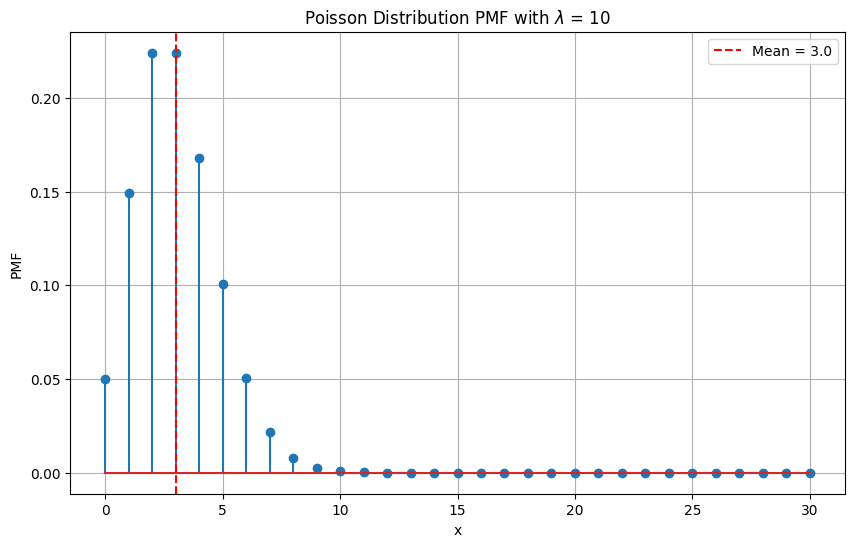

Empirical Mean: 3.0
Variance: 3.0
Skewness: 0.5773502691896257
Kurtosis: 0.3333333333333333


In [3]:
# Exercice 2
# Section a. Create a probability mass function (PMF) plot for x in the range of 0 to 30
lambda_parameter = 3

interval_values = np.arange(0, 31)
poisson_PMF = poisson.pmf(interval_values, lambda_parameter)

# Plotting the PMF
plt.figure(figsize=(10, 6))
plt.stem(interval_values, poisson_PMF, use_line_collection=True)
plt.title("Poisson Distribution PMF with $\lambda$ = 10")
plt.xlabel("x")
plt.ylabel("PMF")
plt.grid(True)

# Section b. Calculate the empirical mean, variance, skewness, and kurtosis
mean_poisson, variance_poisson, skewness_poisson, kurtosis_poisson = poisson.stats(lambda_parameter, moments='mvsk')

# Section c. Represent the empirical mean as a vertical line on the previous plot
plt.axvline(mean_poisson, color='red', linestyle='--', label=f'Mean = {mean_poisson}')
plt.legend()

# Showing the plot and the calculated statistics
plt.show()

# Returning the calculated statistics
print(f"Empirical Mean: {mean_poisson}")
print(f"Variance: {variance_poisson}")
print(f"Skewness: {skewness_poisson}")
print(f"Kurtosis: {kurtosis_poisson}")

**Exercise 3:** Generate a synthetic dataset consisting of 10,000 Poisson random numbers with a parameter of $\lambda=3$. You can achieve this by employing the `poisson.rvs` function.

**a.** Create a normalized histogram of the dataset mentioned above. Compare it with the theoretical distribution used for data generation.

**b.** Obtain and compare the empirical and theoretical cumulative distributions of the dataset. 

C:\Users\pmoll\AppData\Local\Temp\ipykernel_12716\3126811035.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_values, PMF_theoretical, 'r', markerfmt='ro', linefmt='r-', basefmt='r', label='Theoretical', use_line_collection=True)


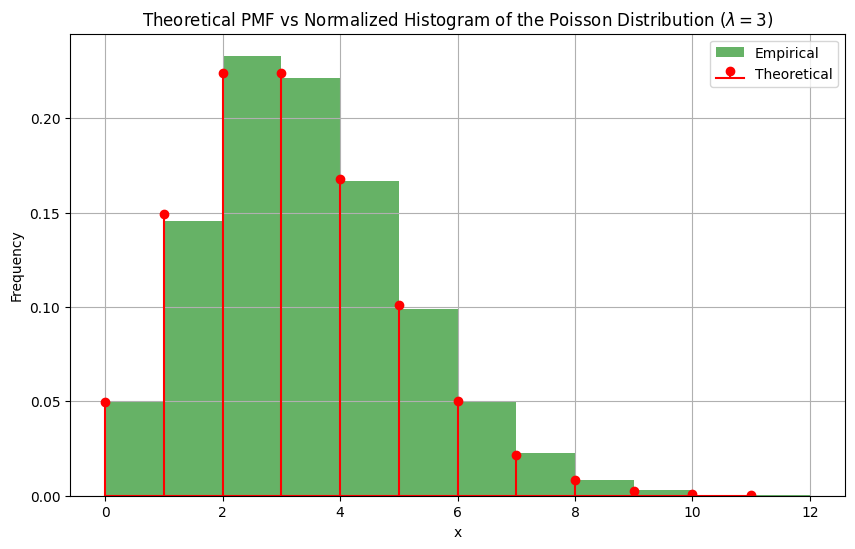

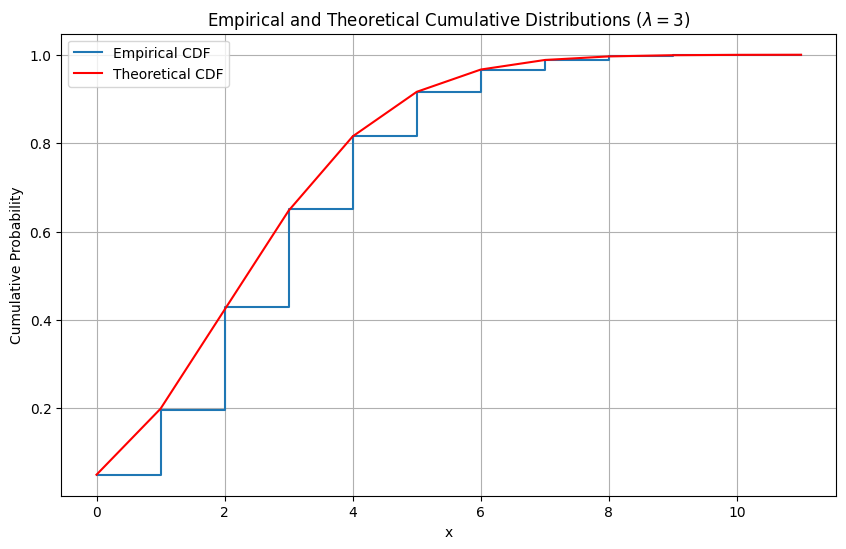

In [4]:
# Exercice 3
# Section a. Create a normalized histogram of the dataset

# Parameters for synthetic dataset generation
#lambda_parameter = 3
# Size of the dataset
size = 10000

#  Synthetic Dataset = Generating 10 000 random points that follow a Poisson Distribution
poisson_synthetic_dataset = poisson.rvs(lambda_parameter, size=size)

# Normalized Histogram
plt.figure(figsize=(10, 6))
plt.hist(poisson_synthetic_dataset, bins=range(0, max(poisson_synthetic_dataset)+2), density=True, alpha=0.6, color='green', label='Empirical')

# Compare it with the theoretical distribution used for data generation
x_values = np.arange(0, max(poisson_synthetic_dataset)+1)
PMF_theoretical = poisson.pmf(x_values, lambda_parameter)
plt.stem(x_values, PMF_theoretical, 'r', markerfmt='ro', linefmt='r-', basefmt='r', label='Theoretical', use_line_collection=True)

plt.title('Theoretical PMF vs Normalized Histogram of the Poisson Distribution ($\lambda=3$)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# b. Obtain and compare the empirical and theoretical cumulative distributions
# Empirical CDF(= Cumulative Distribution Function)
plt.figure(figsize=(10, 6))

#Calculates a histogram of the synthetic data
empirical_normalized_histogram = np.histogram(poisson_synthetic_dataset, bins=range(0, max(poisson_synthetic_dataset)+2), density=True)

# Extracts the first element of the output, which contains the counts (frequencies) of data points in each bin.
empirical_CDF_values = np.cumsum(empirical_normalized_histogram[0])

# Plotting the step graph with the Empirical CDF values
plt.step(x_values, empirical_CDF_values, where='post', label='Empirical CDF')

# Theoretical CDF 
theoretical_CDF_values = poisson.cdf(x_values, lambda_parameter)
plt.plot(x_values, theoretical_CDF_values, 'r-', label='Theoretical CDF')

plt.title('Empirical and Theoretical Cumulative Distributions ($\lambda=3$)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()



**Exercise 4:** Derive the following estimators analytically:

**a.** Using the method of moments, propose an estimator $\hat\lambda$ for the parameter $\lambda$ as a function of a general data set (i.e. $\hat\lambda=g(X_1, X_2, \ldots, X_n)$).

**b.** Find the expression for the log-likelihood of the data $\mathcal{D}=\{X_1, X_2, \ldots, X_n\}$. Show that the maximum likelihood estimator (MLE) $\hat\lambda_\mathrm{MLE}$ is equal to the estimator obtained by the method of moments.

**c.** Prove that the sampling distribution for $\hat\lambda$ is 
$$P(\hat\lambda = k)=\frac{e^{-n\lambda} \left(n\lambda\right)^{nk}}{(nk)!}$$

What sampling distribution do you expect for large values of $n$? 

Help: If you add two independent Poisson distributed random variables, $X\sim P(\lambda_1)$ and $Y\sim P(\lambda_2)$, the result is also Poisson distributed and $X+Y\sim P(\lambda_1+\lambda_2)$. 
Use the Central Limit Theorem to obtain the expression for large $n$

**d.** Calculate the bias, mean square error (MSE), variance, and standard error of $\hat\lambda$. Is the estimator $\hat\lambda$ biased and/or consistent?

**e.** Using the results obtained in **d**, determine the estimated standard error of $\hat\lambda$, denoted $\hat{\mathrm{ SE }}_{\hat\lambda}$. You can use the method of moments for this calculation.

**f.** Obtain the same expression for the estimated standard error using Fisher information of $X$, denoted as $I(\lambda)=-\mathbb{E}\left[\frac{\partial^2}{\partial\lambda ^2} \log P_\lambda(X)\right]$.


To address each part of Exercise 4, let's go through the steps analytically:

**a. Method of Moments Estimator, $\hat{\lambda}$:**

For a Poisson distribution with parameter $\lambda$, the mean (first moment) is equal to $\lambda$. Therefore, the method of moments estimator $\hat{\lambda}$ is the sample mean. 

Given a dataset $ \mathcal{D} = \{X_1, X_2, \ldots, X_{n}\}$, the estimator is:
$$ \hat{\lambda} = \frac{1}{n}\sum_{i=1}^n X_{i} $$

**b. Log-Likelihood and MLE, $\hat{\lambda}_{\mathrm{MLE}}$:**

The probability mass function for a Poisson distribution is:
$$ P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

The likelihood for the dataset $\mathcal{D}$ is:
$$ L(\lambda; \mathcal{D}) = \prod_{i=1}^n \frac{e^{-\lambda} \lambda^{X_i}}{X_{i}!} $$

The log-likelihood is:
$$ \log L(\lambda_{\mathrm{MLE}}; \mathcal{D}) = \sum_{i=1}^n \left( -\lambda_{\mathrm{MLE}} + X_{i} \log(\lambda_{\mathrm{MLE}}) - \log(X_{i}!) \right) $$

$$ = \underbrace{\sum_{i=1}^n ( -\lambda_{\mathrm{MLE}} )}_{-n*\lambda_{\mathrm{MLE}}} + \sum_{i=1}^n X_{i}*\log(\lambda_{\mathrm{MLE}}) - \underbrace{\sum_{i=1}^n \log(X_i!)}_{\text{Not depending on }\lambda_{\mathrm{MLE}}} $$

To find the MLE, we take the derivative of the log-likelihood with respect to $\lambda_{\mathrm{MLE}}$ and set it to zero:
$$ \frac{\partial}{\partial \lambda_{\mathrm{MLE}}}[\log L(\lambda_{\mathrm{MLE}}; \mathcal{D})] = -n + \sum_{i=1}^n \frac{X_{i}}{\lambda_{\mathrm{MLE}}} = 0 $$

$$ \hat{\lambda}_{\mathrm{MLE}} = \frac{1}{n}\sum_{i=1}^n X_{i} $$

We observe that $\hat{\lambda}_{\mathrm{MLE}}$ is the same as the method of moments estimator $\hat{\lambda}$.

**c. Sampling Distribution for $\hat{\lambda}$:**

Since the sum of independent Poisson random variables also follows a Poisson distribution, the sum $\sum_{i=1}^n X_{i}$ follows a Poisson distribution with parameter $n*\lambda$. 
Therefore, the corresponding probability mass function is:

$$ P\left(\sum_{i=1}^n X_{i} = k\right) = \frac{e^{-n\lambda} (n\lambda)^k}{k!} $$

And we would like to have the probability of $\hat\lambda = k$, which is equivalent to $\sum_{i=1}^n X_{i} = n\cdot k$.
Hence, the sampling distribution for $\hat{\lambda}$ is:
$$ P(\hat{\lambda} = k) = \frac{e^{-n\lambda} (n\lambda)^{nk}}{(nk)!} $$

For large $n$, by the Central Limit Theorem, $\hat{\lambda}$ will be approximately normally distributed with mean $\lambda$ and variance $\frac{\lambda}{n}$.

**d. Bias, MSE, Variance, and Standard Error of $\hat{\lambda}$:**

- Bias: 

Since $\mathbb{E}[\hat{\lambda}] = \lambda$ the estimator is unbiased due to:

$$ \mathrm{Bias}(\hat{\lambda}) = \underbrace{E[\hat{\lambda}]}_{\lambda} - \lambda = 0 $$

- Variance: 

$$\mathrm{Var}(\hat{\lambda}) = \frac{\lambda}{n}$$

- MSE: 

$$ \mathrm{MSE}(\hat{\lambda}) = \underbrace{\mathrm{Bias}(\hat{\lambda})^2}_{0^2} + \mathrm{Var}(\hat{\lambda}) = \frac{\lambda}{n} $$

- Standard Error: 

$$ \mathrm{SE}(\hat{\lambda}) = \sqrt{\mathrm{Var}(\hat{\lambda})} = \sqrt{\frac{\lambda}{n}} $$

**Law of Large Numbers**: According to the Law of Large Numbers, the average of a sequence of independent and identically distributed (i.i.d.) random variables converges in probability to the expected value of those random variables as the sample size increases. For the $X_{i}$ which are i.i.d. with a mean of $\lambda$ (since $X_{i} \sim \text{Poisson}(\lambda)$,

$$ \hat{\lambda} = \frac{1}{n}\sum_{i=1}^n X_i \xrightarrow{P} \mathbb{E}[X_i] = \lambda \text{ when } n \rightarrow \infty $$

Since the estimator $\hat{\lambda}$ converges in probability to the true value of the parameter $\lambda$ of the Poisson distribution as the sample size $n$ becomes large, we can conclude that $\hat{\lambda}$ is a consistent estimator for $\lambda$ and unbiased.


**e. Estimated Standard Error of $\hat{\lambda}$, $\hat{\mathrm{SE}}_{\hat{\lambda}}$:**

The estimated standard error can be calculated using the method of moments:
$$ \hat{\mathrm{SE}}_{\hat{\lambda}} = \sqrt{\frac{\hat{\lambda}}{n}} $$

**f. Estimated Standard Error Using Fisher Information:**

The Fisher information $I(\hat\lambda)$ for a Poisson distribution is $\frac{1}{\hat\lambda}$. Therefore, the estimated standard error using Fisher information is:

$$ \text{I}(\hat\lambda) = -\mathbb{E}[\frac{\partial^2}{\partial \hat\lambda^2} \log P_{\hat\lambda}(X)] $$

Thanks to the previous calculations, the second derivative of the log-likelihood with respect to $\lambda$ is:

$$ \frac{\partial^2}{\partial \hat\lambda^2}[\log P_{\hat\lambda}(X)] = -\frac{X}{\hat\lambda^2} $$

Since the expected value $\mathbb{E}[X]$ for a Poisson distribution is $\hat\lambda$, we find the expected value of the second derivative:

$$ \text{I}(\hat\lambda) = -\mathbb{E}[\frac{\partial^2}{\partial \hat\lambda^2} \log P_{\hat\lambda}(X)] $$

$ \hspace{8.9cm} = -\mathbb{E}\left[-\frac{X}{\hat\lambda^2}\right] $

$ \hspace{8.9cm} = \frac{1}{\hat\lambda^2}\underbrace{\mathbb{E}[X]}_{\hat\lambda} = \frac{1}{\hat\lambda} $

Hence, we obtain:

$$ \hat{\mathrm{SE}}_{\hat{\lambda}} = \frac{1}{\sqrt{nI(\hat{\lambda})}} = \frac{1}{\sqrt{\frac{n}{\hat\lambda}}} = \sqrt{\frac{\hat{\lambda}}{n}} $$

Thus, the estimated standard error using Fisher information coincides with the one obtained using the method of moments

**Exercise 5:** Address the following questions using the previously generated synthetic dataset.

**a.** Create a plot of the log-likelihood of the data as a function of $\lambda$. Indicate the value of the maximum of this function.

**b.** Provide an estimate for $\hat\lambda$ along with its standard error, denoted as $\hat{\mathrm{SE}}_{\hat\lambda}$.

**c.** Calculate a 95% confidence interval for the true parameter $\lambda$ using the central limit theorem.

Help. Function `scipy.stats.norm` will be useful for that.

**d.** Determine a 95% confidence interval for $\hat\lambda$ using the Bootstrap method and compare it to the previous interval.

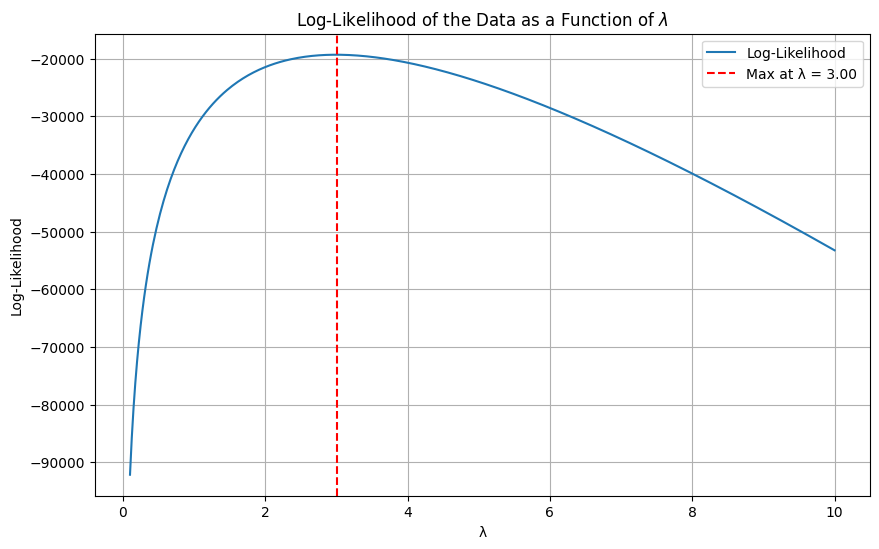

Maximum λ = 3.0030075187969927
\hat λ = 2.9954
Standard Error for \hat λ = 0.017307223925286226
Confidence Interval at 95% - Central Limit Theorem: (2.961478464434069, 3.029321535565931)
Confidence Interval at 95% - Bootstrap Method: (2.960195, 3.0285)


In [5]:
# a. Plot of the log-likelihood of the data as a function of λ

# Define the range of λ values for plotting
lambda_range = np.linspace(0.1, 10, 400)
log_likelihoods = []

# Calculate the log-likelihood for each λ in the range
n = len(poisson_synthetic_dataset)
for lambda_param in lambda_range:
    log_likelihoods.append(np.sum(poisson.logpmf(poisson_synthetic_dataset, lambda_param)))

# Find the λ value that maximizes the log-likelihood
max_log_likelihood = max(log_likelihoods)
# We extract the position then the value
max_lambda = lambda_range[np.argmax(log_likelihoods)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_range, log_likelihoods, label="Log-Likelihood")
plt.axvline(max_lambda, color="red", linestyle="dashed", label=f"Max at λ = {max_lambda:.2f}")
plt.title("Log-Likelihood of the Data as a Function of $\lambda$")
plt.xlabel("λ")
plt.ylabel("Log-Likelihood")
plt.legend()
plt.grid(True)
plt.show()


# b. Estimate for λ and its standard error

# The estimate for λ is the mean of the data
hat_lambda = np.mean(poisson_synthetic_dataset)

# Standard error for λ
se_hat_lambda = np.sqrt(hat_lambda / n)

# c. 95% confidence interval for λ using the central limit theorem
# Z-score for 95% confidence
z_score = norm.ppf(0.975)
ci_lower = hat_lambda - z_score * se_hat_lambda
ci_upper = hat_lambda + z_score * se_hat_lambda

ci_central_limit = (ci_lower, ci_upper)

# d. 95% confidence interval for hat λ using the Bootstrap method
bootstrap_estimates = []

# Number of bootstrap samples
num_bootstrap_samples = 1000
bootstrap_samples = np.random.choice(poisson_synthetic_dataset, (num_bootstrap_samples, len(poisson_synthetic_dataset)), replace=True)
bootstrap_means = np.mean(bootstrap_samples, axis = 1)

# Calculate the 95% confidence interval from the bootstrap samples
ci_lower_bootstrap = np.percentile(bootstrap_means, 2.5)
ci_upper_bootstrap = np.percentile(bootstrap_means, 97.5)
ci_bootstrap = (ci_lower_bootstrap, ci_upper_bootstrap)

ci_bootstrap


# Returning the calculated values
print(f"Maximum λ = {max_lambda}")
print(f"\hat λ = {hat_lambda}")
print(f"Standard Error for \hat λ = {se_hat_lambda}")
print(f"Confidence Interval at 95% - Central Limit Theorem: {ci_central_limit}")
print(f"Confidence Interval at 95% - Bootstrap Method: {ci_bootstrap}")


**Exercise 6:** Repeat the entire experiment of generating $n$ random numbers $T=1000$ times. In each experiment indexed as $t$, calculate an estimate $\hat\lambda_t$, based on the observed data. Store the results from each experiment in an array and create a density histogram of the obtained results. Repeat this process for three different values of $n$: 10, 100, and 1000.

**a.** For each value of $n$, compare the histogram with both the theoretical sampling distribution for $\hat\lambda$ and the expected Gaussian behavior for large $n$.

**b.** For $n=1000$, verify that the true value of $\lambda$ ($\lambda=3$) is contained within the $1-\alpha$-confidence interval only in $1-\alpha$-percent of the $T$ experiments. Consider $\alpha=0.05$.

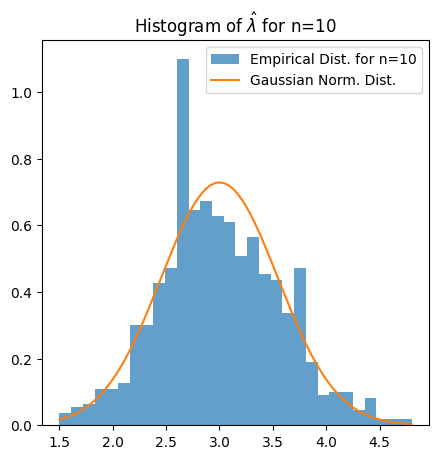

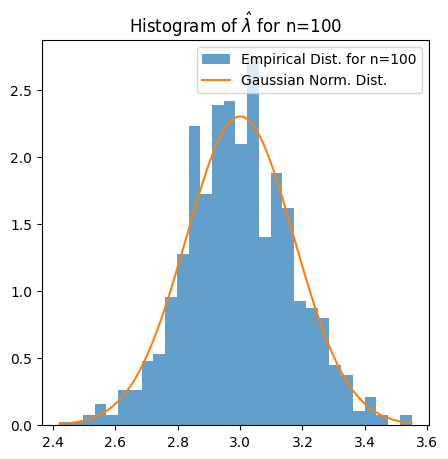

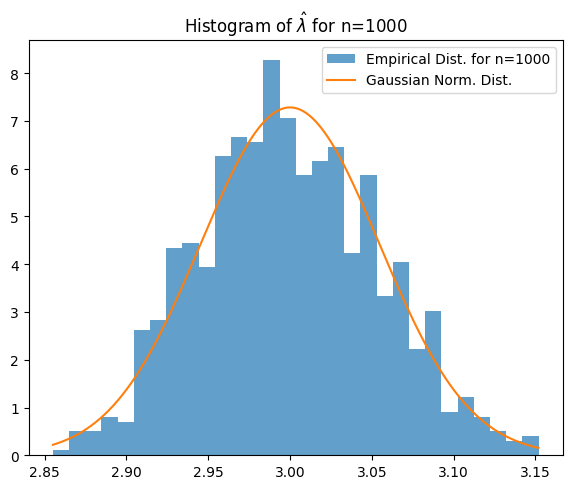

In [6]:
# Parameters for the experiment
T = 1000
sample_sizes = [10, 100, 1000]
alpha = 0.05

# We store the results from each experiment in an array
hat_lambda_estimates = [[], [], []]

# We repeat the experiment T times for each sample size
for i, n in enumerate(sample_sizes):
    for _ in range(T):
        # We generate n random Poisson numbers and calculate the estimate \hat\lambda (mean)
        poisson_synthetic_dataset_experiment = poisson.rvs(mu=lambda_parameter, size=n)
        hat_lambda = np.mean(poisson_synthetic_dataset_experiment)
        hat_lambda_estimates[i].append(hat_lambda)

# Plotting the density histograms for each sample size [10, 100, 1000]
# with the theoretical distribution
for i, n in enumerate(sample_sizes):
    plt.figure(figsize=(17, 5))
    
    plt.subplot(1, 3, i+1)
    # Density Histogram
    plt.hist(hat_lambda_estimates[i], bins=30, density=True, alpha=0.7, label=f'Empirical Dist. for n={n}')
    
    # Theoretical Distribution
    x = np.linspace(min(hat_lambda_estimates[i]), max(hat_lambda_estimates[i]), 1000)
    plt.plot(x, norm.pdf(x, loc=lambda_parameter, scale=np.sqrt(lambda_parameter/n)), label='Gaussian Norm. Dist.')
    plt.title(f'Histogram of $\hat{{\lambda}}$ for n={n}')
    plt.legend()

plt.tight_layout()
plt.show()




**Exercise 7: Hypothesis testing with real data**. 

Category 4 hurricanes are tropical cyclones. The file `Category4Hurricanes - Sheet1.csv` contains a list of all hurricanes recorded in the Atlantic Sea since 1850. We analyze the data under the hypothesis that the number of hurricanes per year follows a Poisson distribution with a certain parameter $\lambda$.

In the following code, I provide a way to extract the number of hurricanes recorded per year and a visualization of this data in a bar chart.

For the following, you can access to the years in `year_counts['Year']` and to the counts in `year_counts['Count']`.

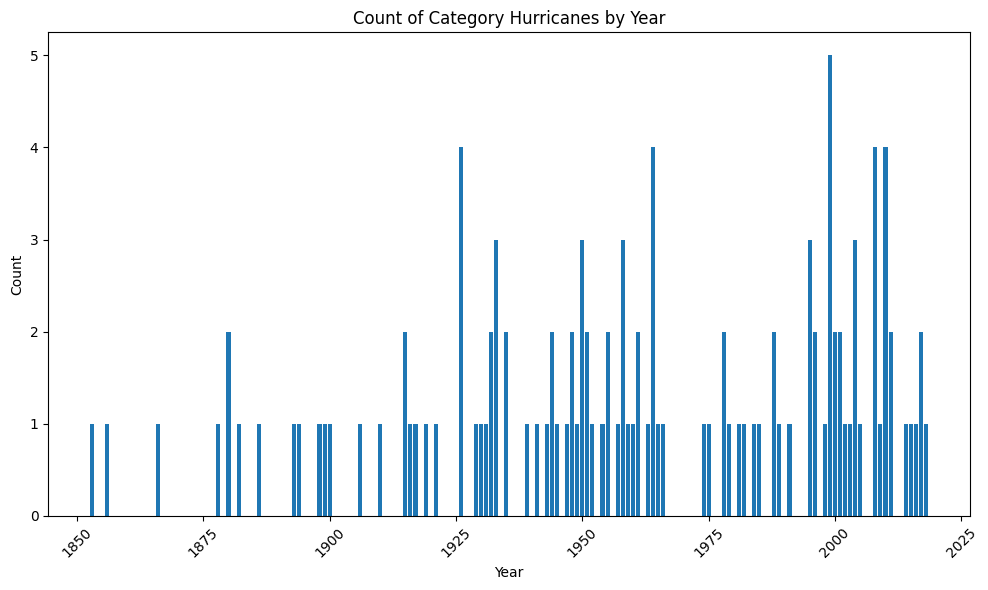

In [7]:
import pandas as pd

df = pd.read_csv('Category4Hurricanes - Sheet1.csv')
# Count the occurrences of each unique year and store it in a DataFrame
year_counts = df['Season'].value_counts().reset_index()
# Rename the columns for clarity
year_counts.columns = ['Year', 'Count']


# Sort the DataFrame by year if nee
year_counts = year_counts.sort_values(by='Year')


# Create a DataFrame with all possible years within the range of your data
all_years = pd.DataFrame({'Year': range(year_counts['Year'].min(), year_counts['Year'].max() + 1)})

# Merge the year_counts DataFrame with the all_years DataFrame, filling NaN values with zeros
year_counts = pd.merge(all_years, year_counts, on='Year', how='left').fillna(0)

year_counts['Count'] = year_counts['Count'].astype(int)

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(year_counts['Year'], year_counts['Count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Category Hurricanes by Year')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

**a.** Plot a histogram of the number of observed hurricanes (the counts) by year and compare it to the Poisson distribution that would correspond to an estimate of $\lambda$ using all historical count data.

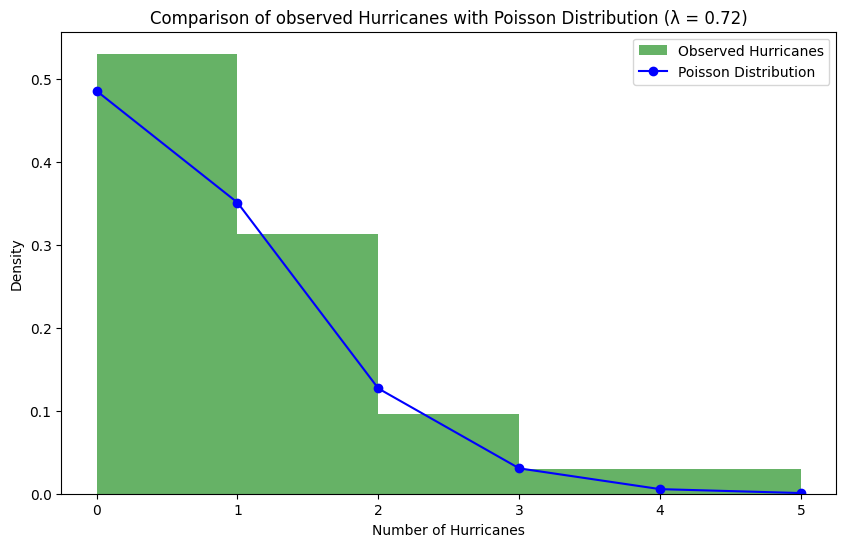

In [8]:
# We estimate λ using all historical count data
hat_lambda = year_counts['Count'].mean()

# We compare it to the Poisson distribution
plt.figure(figsize=(10, 6))
plt.hist(year_counts['Count'], bins=range(int(year_counts['Count'].max())+1), density=True, alpha=0.6, label='Observed Hurricanes', color="green")
x_values = np.arange(0, int(year_counts['Count'].max()) + 1)
poisson_values = poisson.pmf(x_values, hat_lambda)
plt.plot(x_values, poisson_values, 'bo-', label='Poisson Distribution')
plt.xlabel('Number of Hurricanes')
plt.ylabel('Density')
plt.title(f'Comparison of observed Hurricanes with Poisson Distribution (λ = {hat_lambda:.2f})')
plt.legend()
plt.show()



**b.** In the chart displayed above, it is evident that the frequency of hurricanes has been on the rise over time. The Atlantic hurricane reanalysis project (more details can be found at https://en.wikipedia.org/wiki/Atlantic_hurricane_reanalysis_project) recognized as early as 1957 that the increasing trend in the number of tropical cyclones each season in the Atlantic Basin was, in part, attributed to improved observations and better record-keeping. However, what is notable is that the average number of hurricanes per year appears to continue increasing year after year. 

With this in mind, let's estimate $\lambda_0$ using $\hat\lambda_\text{old}$ obtained by analyzing data from 1950 to 1999. We'll also estimate $\hat\lambda_\text{new}$ using data from 2000 onwards. Then, create histograms representing the hurricane counts recorded in each of these two time periods and compare them with the Poisson distributions with $\lambda$ equal to $\hat\lambda_\text{old}$ and $\hat\lambda_\text{new}$. 

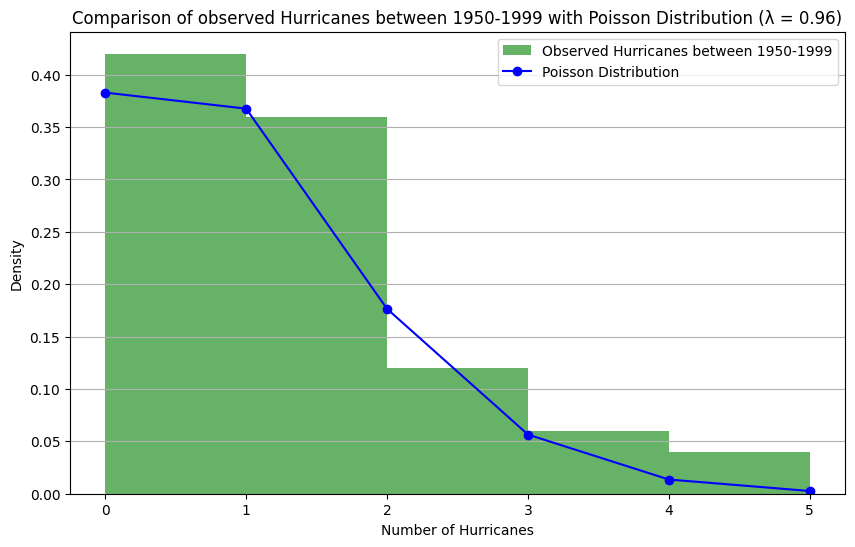

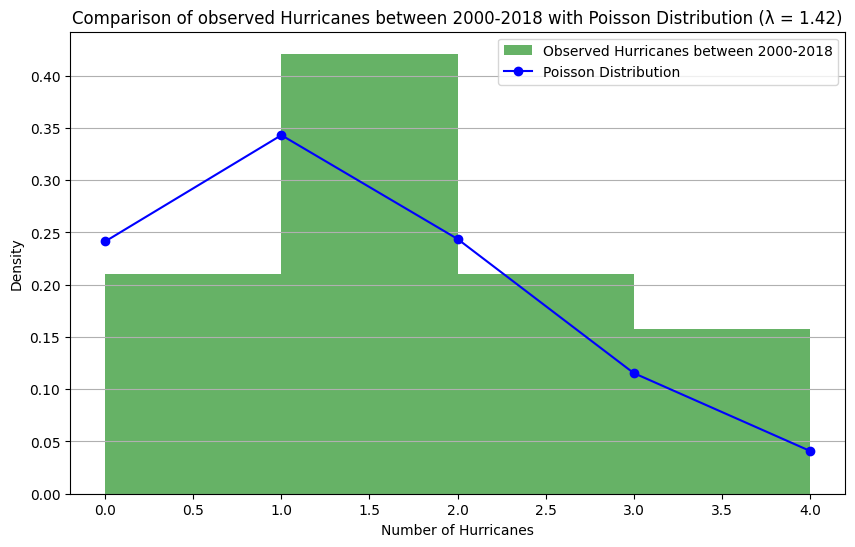

In [9]:
old_dataset = year_counts[(year_counts['Year'] >= 1950) & (year_counts['Year'] <= 1999)]
new_dataset = year_counts[year_counts['Year'] >= 2000]

# We estimate λ using all historical count data
hat_lambda_old = old_dataset["Count"].mean()
hat_lambda_new = new_dataset["Count"].mean()

# We compare it to the old Poisson distribution
plt.figure(figsize=(10, 6))
plt.hist(old_dataset["Count"], bins=range(int(old_dataset["Count"].max())+1), density=True, alpha=0.6, label='Observed Hurricanes between 1950-1999', color="green")
x_values_old = np.arange(0, int(old_dataset["Count"].max()) + 1)
poisson_values_old = poisson.pmf(x_values_old, hat_lambda_old)
plt.plot(x_values_old, poisson_values_old, 'bo-', label='Poisson Distribution')
plt.xlabel('Number of Hurricanes')
plt.ylabel('Density')
plt.grid(axis="y")
plt.title(f'Comparison of observed Hurricanes between 1950-1999 with Poisson Distribution (λ = {hat_lambda_old:.2f})')
plt.legend()
plt.show()


# We compare it to the new Poisson distribution
plt.figure(figsize=(10, 6))
plt.hist(new_dataset["Count"], bins=range(int(new_dataset["Count"].max())+1), density=True, alpha=0.6, label='Observed Hurricanes between 2000-2018', color="green")
x_values_new = np.arange(0, int(new_dataset["Count"].max()) + 1)
poisson_values_new = poisson.pmf(x_values_new, hat_lambda_new)
plt.plot(x_values_new, poisson_values_new, 'bo-', label='Poisson Distribution')
plt.xlabel('Number of Hurricanes')
plt.ylabel('Density')
plt.grid(axis="y")
plt.title(f'Comparison of observed Hurricanes between 2000-2018 with Poisson Distribution (λ = {hat_lambda_new:.2f})')
plt.legend()
plt.show()

**c.**  Now, our objective is to test the hypothesis that there has been a change in the frequency of hurricanes in recent years. To achieve this, we formulate the following hypotheses:

$H_0$: Nothing has changed, which implies $\lambda=\lambda_\mathrm{old}$

$H_1$: There is a change, meaning $\lambda\neq\lambda_\mathrm{old}$

In our hypothesis test, we will reject the null hypothesis $H_0$ if the estimate $\hat\lambda_\mathrm{new}$ is greater than a critical value $\lambda_\alpha$, where $\alpha$ represents the significance level.

To determine the value of $\lambda_\alpha$ for rejecting the null hypothesis at a significance level of $\alpha=0.05$, you can leverage the previously derived null distribution for $\hat\lambda$, which is expressed as:

$$P(\hat\lambda = x) = \frac{e^{-n\lambda_\mathrm{old}} \left(n\lambda_\mathrm{old}\right)^{nx}}{(nx)!} = f(nx,n\lambda_\mathrm{old}),$$
where $f(x,\lambda)$ is the Poisson distribution defined at the begining of this notebook.

Help: You can obtain $\lambda_\alpha$ using the cumulative distribution function (CDF) of the Poisson distribution.

**d.** Do we accept the hypothesis? Which is the p-value?

To determine $\lambda_\alpha$ analytically through equations, we operate as follows:

### Hypothesis and Distribution

We assume that under the null hypothesis $H_0$, the frequency of hurricanes per year follows a Poisson distribution with parameter $\lambda = \lambda_{\text{old}}$. We want to find a critical value $\lambda_{\alpha}$ such that if the estimate $\hat{\lambda}_{\text{new}}$ is greater than $\lambda_{\alpha}$, we will reject $H_{0}$ with a significance level $\alpha$.

### Establishing the Equation

For a significance level $\alpha$, we are looking for a value $\lambda_{\alpha}$ such that:

$$ P(\hat{\lambda} \geq \lambda_{\alpha} \mid H_{0}) = \alpha $$

The probability on the left side can be rewritten using the cumulative distribution function (CDF) of the Poisson distribution:

$$ 1 - P(\hat{\lambda} < \lambda_{\alpha} \mid H_{0}) = \alpha $$

$$ P(\hat{\lambda} < \lambda_{\alpha} \mid H_{0}) = 1 - \alpha $$

In terms of the Poisson distribution, this turns into:

$$ \text{CDF}(\lambda_{\alpha}; n\lambda_{\text{old}}) = 1 - \alpha $$

where $n$ is the number of years in the dataset and $n \cdot \lambda_{\text{old}}$ is the parameter of the Poisson distribution for the total sum of hurricanes under the null hypothesis.

### Solving for $\lambda_{\alpha}$

To solve for $\lambda_{\alpha}$, we use the inverse of the cumulative distribution function (the percent point function, or $ppf$):

$$ \lambda_{\alpha} = \frac{\text{ppf}(1 - \alpha, n\lambda_{\text{old}})}{n} $$

This equation provides the critical value $\lambda_\alpha$ for a given significance level $\alpha$. If our estimate $\hat{\lambda}_{\text{new}}$ is greater than $\lambda_{\alpha}$, we have evidence to reject the null hypothesis in favor of the alternative hypothesis that there has been a change in the frequency of hurricanes.

In [12]:
# Parameters
alpha = 0.05

# Determine the value of λ_alpha for rejecting the null hypothesis
# The critical value λ_alpha is the value for which the CDF of the Poisson distribution equals 1-alpha
# We use the PPF (percent point function)
n_new = len(new_dataset)
lambda_alpha = poisson.ppf(1 - alpha, mu=n_new * hat_lambda_old) / n_new

# Compare λ_new with λ_alpha to test the hypothesis
reject_h0 = hat_lambda_new > lambda_alpha

# Calculating the p-value
p_value = 1 - poisson.cdf(n_new * hat_lambda_new -1, mu=n_new * hat_lambda_old)

lambda_alpha, reject_h0, p_value
print(f"Lambda_old: {hat_lambda_old}")
print(f"Lambda_new: {hat_lambda_new}")
print(f"lambda_alpha: {lambda_alpha}")
print(f"p_value: {p_value:.10f}")

print(f"As reject_h0 = {reject_h0}, we can conclude that we reject the Null Hypothesis.")


Lambda_old: 0.96
Lambda_new: 1.4210526315789473
lambda_alpha: 1.368421052631579
p_value: 0.0323777458
As reject_h0 = True, we can conclude that we reject the Null Hypothesis.
